In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/sales_and_customer_insights.csv')

print(df.head())
print(df.info())
print(df.describe())

   Customer_ID   Product_ID Transaction_ID  Purchase_Frequency  \
0  CUST_9HOS83  PROD_IK97D1   TRANS_II1DZG                  17   
1  CUST_AJU17N  PROD_UNN7KP   TRANS_9HJF7I                  10   
2  CUST_11XNYF  PROD_0XEW2W   TRANS_OT96OM                   3   
3  CUST_IGH8G3  PROD_3IIAJN   TRANS_45V00G                  12   
4  CUST_OK6PUM  PROD_VMIWD2   TRANS_ZAK760                  18   

   Average_Order_Value Most_Frequent_Category  Time_Between_Purchases  \
0               172.57            Electronics                      45   
1                64.89               Clothing                       6   
2               120.38                 Sports                      23   
3                70.34               Clothing                       5   
4                42.39            Electronics                      10   

          Region  Churn_Probability  Lifetime_Value Launch_Date  \
0  South America               0.98          952.81  2020-03-14   
1  South America              

In [3]:
#Count Customers by retention strategy
strategy_counts = df['Retention_Strategy'].value_counts()
print(strategy_counts)

Retention_Strategy
Loyalty Program    3364
Email Campaign     3359
Discount           3277
Name: count, dtype: int64


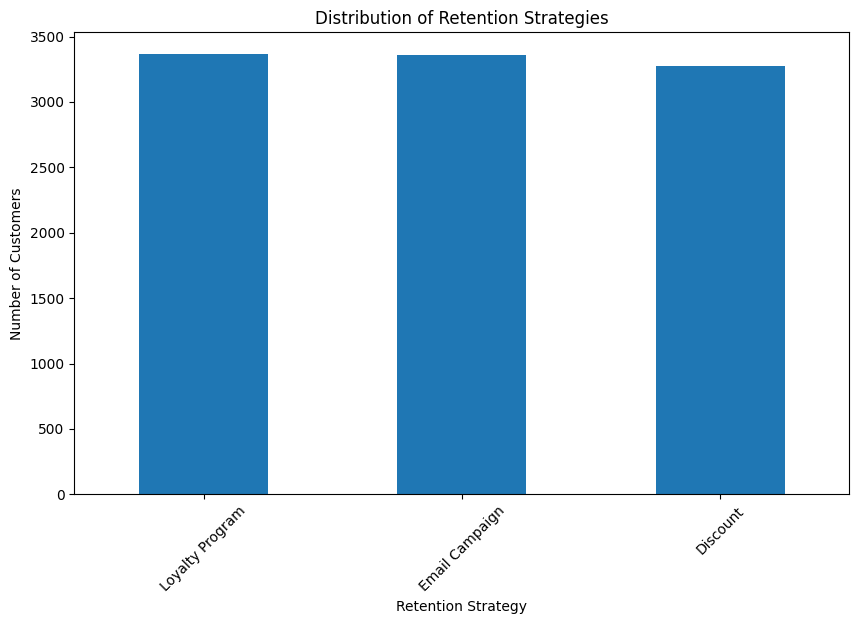

In [4]:
#Visualize
plt.figure(figsize=(10,6))
strategy_counts.plot(kind='bar')
plt.title('Distribution of Retention Strategies')
plt.xlabel('Retention Strategy')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

In [5]:
strategy_analysis = df.groupby('Retention_Strategy').agg({
     'Churn_Probability': 'mean',
     'Lifetime_Value': 'mean',
     'Purchase_Frequency': 'mean',
     'Average_Order_Value': 'mean',
     'Customer_ID': 'count'
 }).round(2)

strategy_analysis.columns = ['Avg_Churn_Prob', 'Avg_LTV', 'Avg_Purchase_Freq', 'Avg_Order_Value', 'Customer_Count']

print(strategy_analysis)

                    Avg_Churn_Prob  Avg_LTV  Avg_Purchase_Freq  \
Retention_Strategy                                               
Discount                      0.50  5037.53               9.88   
Email Campaign                0.51  5045.81               9.95   
Loyalty Program               0.49  5012.62              10.03   

                    Avg_Order_Value  Customer_Count  
Retention_Strategy                                   
Discount                     110.65            3277  
Email Campaign               109.94            3359  
Loyalty Program              109.44            3364  


**Customer Segmentation**

In [6]:
# Segment customers by churn risk
def assign_risk_level(churn_prob):
  if churn_prob < 0.3:
    return 'Low Risk'
  elif churn_prob < 0.6:
    return 'Medium Risk'
  else:
    return 'High Risk'

df['Risk_Level'] = df['Churn_Probability'].apply(assign_risk_level)

#Analyse
risk_summary = df.groupby('Risk_Level').agg({
    'Customer_ID': 'count',
    'Lifetime_Value': 'mean',
    'Purchase_Frequency': 'mean',
}).round(2)

print(risk_summary)

             Customer_ID  Lifetime_Value  Purchase_Frequency
Risk_Level                                                  
High Risk           4039         5011.03               10.07
Low Risk            2908         5034.80                9.80
Medium Risk         3053         5056.86                9.96


Retention_Strategy  Discount  Email Campaign  Loyalty Program
Risk_Level                                                   
High Risk              0.795           0.802            0.801
Low Risk               0.148           0.150            0.147
Medium Risk            0.447           0.442            0.442


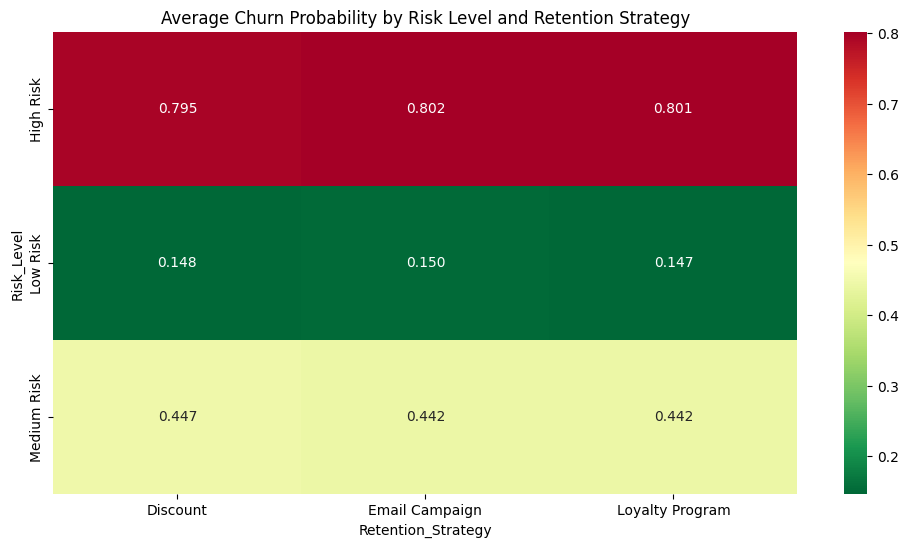

In [7]:
# Create pivot table
pivot_analysis = df.pivot_table(
    values='Churn_Probability',
    index='Risk_Level',
    columns='Retention_Strategy',
    aggfunc='mean'
).round(3)

print(pivot_analysis)

# Visualize with heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot_analysis, annot=True, cmap='RdYlGn_r', fmt='.3f')
plt.title('Average Churn Probability by Risk Level and Retention Strategy')
plt.show()

Pattern Discovery and Feature Engineering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/sales_and_customer_insights.csv')

# Strategy effectiveness by region
regional_analysis = df.groupby(['Region', 'Retention_Strategy']).agg({
    'Churn_Probability': 'mean',
    'Lifetime_Value': 'mean',
    'Customer_ID': 'count'
}).round(2)

print(regional_analysis)

                                  Churn_Probability  Lifetime_Value  \
Region        Retention_Strategy                                      
Asia          Discount                         0.51         5154.02   
              Email Campaign                   0.52         5155.00   
              Loyalty Program                  0.50         4838.18   
Europe        Discount                         0.48         4949.61   
              Email Campaign                   0.49         4934.71   
              Loyalty Program                  0.50         5088.42   
North America Discount                         0.51         5058.84   
              Email Campaign                   0.51         5044.21   
              Loyalty Program                  0.49         5120.02   
South America Discount                         0.51         4997.51   
              Email Campaign                   0.51         5043.16   
              Loyalty Program                  0.49         5004.21   

     

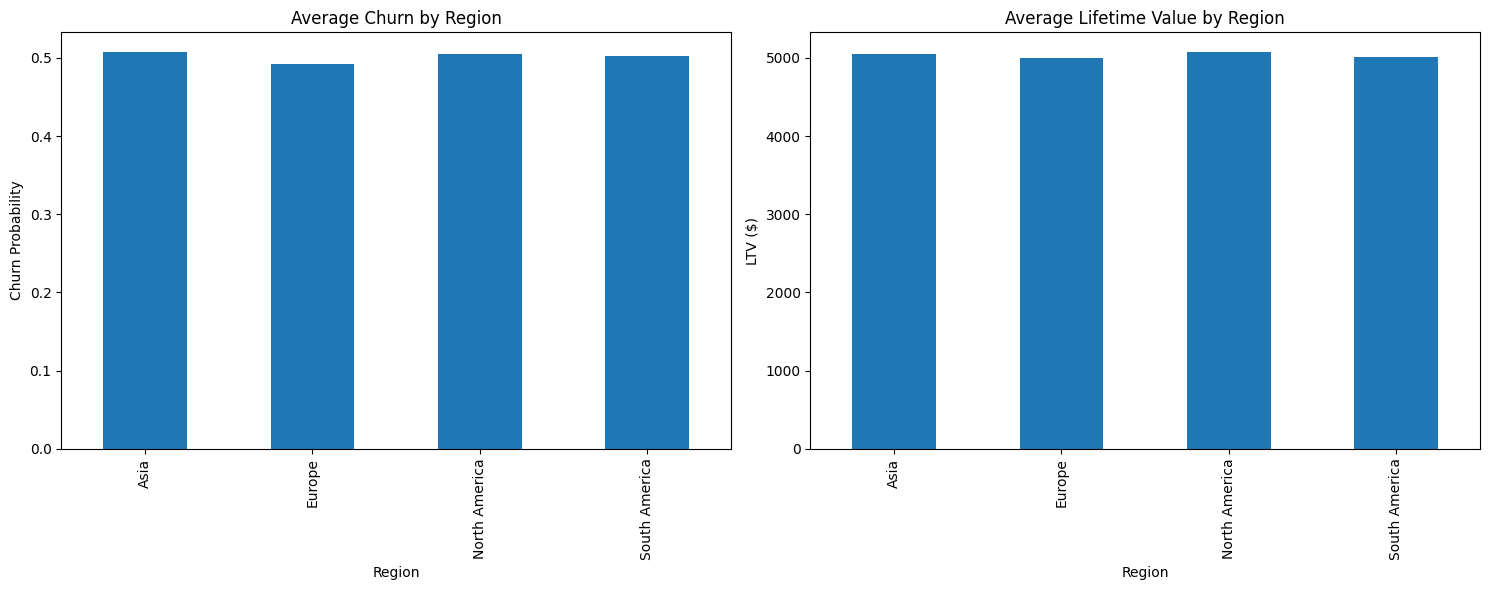

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15,6))

df.groupby('Region')['Churn_Probability'].mean().plot(kind='bar', ax=axes[0])
axes[0].set_title('Average Churn by Region')
axes[0].set_ylabel('Churn Probability')

df.groupby('Region')['Lifetime_Value'].mean().plot(kind='bar', ax=axes[1])
axes[1].set_title('Average Lifetime Value by Region')
axes[1].set_ylabel('LTV ($)')

plt.tight_layout()
plt.show()

                        Churn_Probability  Purchase_Frequency  \
Most_Frequent_Category                                          
Clothing                             0.50                9.90   
Electronics                          0.51               10.03   
Home                                 0.50                9.90   
Sports                               0.49                9.99   

                        Time_Between_Purchases  
Most_Frequent_Category                          
Clothing                                 47.20  
Electronics                              46.19  
Home                                     47.35  
Sports                                   46.82  


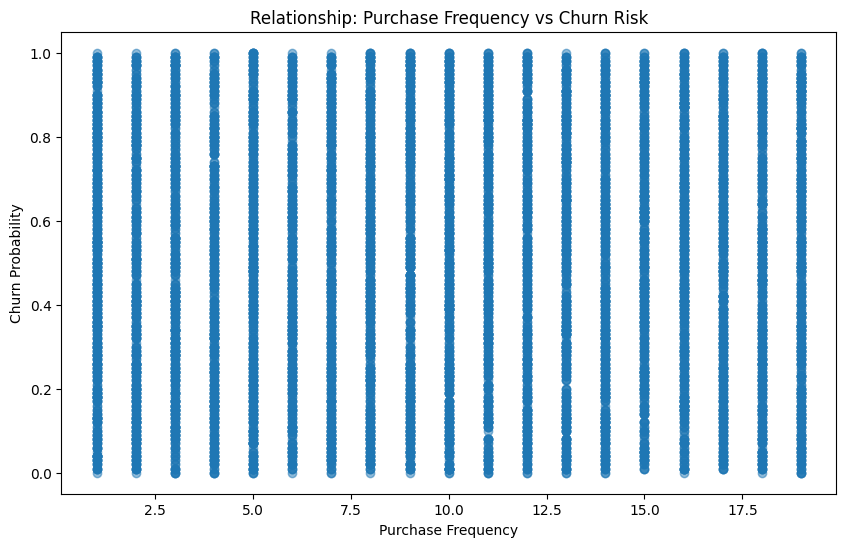

In [10]:
# Analyze purchase behavior
behavior_analysis = df.groupby('Most_Frequent_Category').agg({
    'Churn_Probability': 'mean',
    'Purchase_Frequency': 'mean',
    'Time_Between_Purchases': 'mean'
}).round(2)

print(behavior_analysis)

# Create scatter plot: Purchase Frequency vs Churn
plt.figure(figsize=(10,6))
plt.scatter(df['Purchase_Frequency'], df['Churn_Probability'], alpha=0.5)
plt.xlabel('Purchase Frequency')
plt.ylabel('Churn Probability')
plt.title('Relationship: Purchase Frequency vs Churn Risk')
plt.show()

Feature Engineering

In [11]:
# Segment customers by churn risk
def assign_risk_level(churn_prob):
  if churn_prob < 0.3:
    return 'Low Risk'
  elif churn_prob < 0.6:
    return 'Medium Risk'
  else:
    return 'High Risk'

df['Risk_Level'] = df['Churn_Probability'].apply(assign_risk_level)

# Create value segments
df['LTV_Segment'] = pd.qcut(df['Lifetime_Value'], q=3,
                             labels=['Low Value', 'Medium Value', 'High Value'])

# Create engagement score
df['Engagement_Score'] = (
    (df['Purchase_Frequency'] / df['Purchase_Frequency'].max()) * 0.5 +
    (1 - df['Time_Between_Purchases'] / df['Time_Between_Purchases'].max()) * 0.5
).round(3)

# Create success metric for retention strategy
df['Strategy_Success'] = (df['Churn_Probability'] < 0.4).astype(int)

print(df[['Customer_ID', 'Risk_Level', 'LTV_Segment', 'Engagement_Score', 'Strategy_Success']].head())

   Customer_ID   Risk_Level   LTV_Segment  Engagement_Score  Strategy_Success
0  CUST_9HOS83    High Risk     Low Value             0.695                 0
1  CUST_AJU17N    High Risk  Medium Value             0.729                 0
2  CUST_11XNYF    High Risk  Medium Value             0.450                 0
3  CUST_IGH8G3    High Risk  Medium Value             0.788                 0
4  CUST_OK6PUM  Medium Risk    High Value             0.918                 0


In [12]:
# For each customer profile, find most successful strategy
profile_success = df.groupby(['Risk_Level', 'Region', 'Most_Frequent_Category',
                               'Retention_Strategy'])['Strategy_Success'].mean()

best_strategies = profile_success.groupby(['Risk_Level', 'Region',
                                           'Most_Frequent_Category']).idxmax()

print("Best strategies by customer profile:")
print(best_strategies.head(10))

Best strategies by customer profile:
Risk_Level  Region         Most_Frequent_Category
High Risk   Asia           Clothing                              (High Risk, Asia, Clothing, Discount)
                           Electronics                        (High Risk, Asia, Electronics, Discount)
                           Home                                      (High Risk, Asia, Home, Discount)
                           Sports                                  (High Risk, Asia, Sports, Discount)
            Europe         Clothing                            (High Risk, Europe, Clothing, Discount)
                           Electronics                      (High Risk, Europe, Electronics, Discount)
                           Home                                    (High Risk, Europe, Home, Discount)
                           Sports                                (High Risk, Europe, Sports, Discount)
            North America  Clothing                     (High Risk, North America, Clothi

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/sales_and_customer_insights.csv')

from scipy import stats

Statistical Validation

In [14]:
# Example: Compare two strategies
strategy_a = df[df['Retention_Strategy'] == 'Discount']['Churn_Probability'] # Corrected to 'Discount'
strategy_b = df[df['Retention_Strategy'] == 'Loyalty Program']['Churn_Probability'] # Corrected to 'Loyalty Program'

t_stat, p_value = stats.ttest_ind(strategy_a, strategy_b)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Statistically significant difference!")
else:
    print("No significant difference")

T-statistic: 1.3420, P-value: 0.1797
No significant difference


ROI Insight

In [15]:
# Calculate average LTV improvement by strategy
roi_analysis = df.groupby('Retention_Strategy').agg({
    'Lifetime_Value': ['mean', 'median'],
    'Churn_Probability': 'mean',
    'Customer_ID': 'count'
}).round(2)

roi_analysis.columns = ['Avg_LTV', 'Median_LTV', 'Avg_Churn', 'Customer_Count']
roi_analysis['Potential_Revenue'] = roi_analysis['Avg_LTV'] * roi_analysis['Customer_Count']

print(roi_analysis.sort_values('Potential_Revenue', ascending=False))

                    Avg_LTV  Median_LTV  Avg_Churn  Customer_Count  \
Retention_Strategy                                                   
Email Campaign      5045.81     5057.82       0.51            3359   
Loyalty Program     5012.62     4957.37       0.49            3364   
Discount            5037.53     5006.55       0.50            3277   

                    Potential_Revenue  
Retention_Strategy                     
Email Campaign            16948875.79  
Loyalty Program           16862453.68  
Discount                  16507985.81  


Recommendation Engine

In [16]:
import pandas as pd

# Re-create Risk_Level
def assign_risk_level(churn_prob):
  if churn_prob < 0.3:
    return 'Low Risk'
  elif churn_prob < 0.6:
    return 'Medium Risk'
  else:
    return 'High Risk'

df['Risk_Level'] = df['Churn_Probability'].apply(assign_risk_level)

# Re-create LTV_Segment
df['LTV_Segment'] = pd.qcut(df['Lifetime_Value'], q=3,
                             labels=['Low Value', 'Medium Value', 'High Value'])

# Re-create Engagement_Score
df['Engagement_Score'] = (
    (df['Purchase_Frequency'] / df['Purchase_Frequency'].max()) * 0.5 +
    (1 - df['Time_Between_Purchases'] / df['Time_Between_Purchases'].max()) * 0.5
).round(3)

def recommend_strategy(row):
    """
    Rule-based recommendation system
    """
    risk = row['Risk_Level']
    region = row['Region']
    ltv_segment = row['LTV_Segment']
    engagement = row['Engagement_Score']

    # High-value customers at high risk
    if ltv_segment == 'High Value' and risk == 'High Risk':
        return 'VIP Treatment'

    # High engagement, low risk
    elif engagement > 0.7 and risk == 'Low Risk':
        return 'Loyalty Programs'

    # Medium risk, needs incentive
    elif risk == 'Medium Risk':
        return 'Discounts'

    # Low engagement
    elif engagement < 0.3:
        return 'Re-engagement Campaign'

    else:
        return 'Standard Communication'

# Apply recommendations
df['Recommended_Strategy'] = df.apply(recommend_strategy, axis=1)

# Compare current vs recommended
comparison = df.groupby(['Retention_Strategy', 'Recommended_Strategy']).size().unstack(fill_value=0)
print(comparison)

Recommended_Strategy  Discounts  Loyalty Programs  Re-engagement Campaign  \
Retention_Strategy                                                          
Discount                    996               174                     328   
Email Campaign             1036               148                     338   
Loyalty Program            1021               197                     318   

Recommended_Strategy  Standard Communication  VIP Treatment  
Retention_Strategy                                           
Discount                                1322            457  
Email Campaign                          1384            453  
Loyalty Program                         1392            436  


Evaluation of Recommemmdations

In [17]:
# Calculate potential improvement
df['Current_Expected_Churn'] = df['Churn_Probability']

# Simulate improvement (based on your analysis from Week 1-2)
strategy_impact = {
    'VIP Treatment': 0.85,  # 15% reduction
    'Loyalty Programs': 0.90,  # 10% reduction
    'Discounts': 0.92,  # 8% reduction
    'Re-engagement Campaign': 0.88,  # 12% reduction
    'Standard Communication': 1.0  # No change
}

df['Projected_Churn'] = df.apply(
    lambda row: row['Current_Expected_Churn'] * strategy_impact.get(row['Recommended_Strategy'], 1.0),
    axis=1
)

# Calculate improvement
improvement = df.groupby('Recommended_Strategy').agg({
    'Current_Expected_Churn': 'mean',
    'Projected_Churn': 'mean',
    'Customer_ID': 'count'
}).round(3)

improvement['Churn_Reduction'] = (
    (improvement['Current_Expected_Churn'] - improvement['Projected_Churn']) /
    improvement['Current_Expected_Churn'] * 100
).round(2)

print(improvement)

                        Current_Expected_Churn  Projected_Churn  Customer_ID  \
Recommended_Strategy                                                           
Discounts                                0.444            0.408         3053   
Loyalty Programs                         0.146            0.131          519   
Re-engagement Campaign                   0.457            0.402          984   
Standard Communication                   0.503            0.503         4098   
VIP Treatment                            0.797            0.677         1346   

                        Churn_Reduction  
Recommended_Strategy                     
Discounts                          8.11  
Loyalty Programs                  10.27  
Re-engagement Campaign            12.04  
Standard Communication             0.00  
VIP Treatment                     15.06  


ML Modelling

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Prepare data
le_dict = {}
categorical_cols = ['Region', 'Most_Frequent_Category', 'Retention_Strategy',
                    'Preferred_Purchase_Times', 'Season']

df_ml = df.copy()

# Encode categorical variables
for col in categorical_cols:
    le = LabelEncoder()
    df_ml[col + '_encoded'] = le.fit_transform(df_ml[col])
    le_dict[col] = le

# Features for prediction
feature_cols = ['Purchase_Frequency', 'Average_Order_Value', 'Time_Between_Purchases',
                'Lifetime_Value', 'Engagement_Score', 'Region_encoded',
                'Most_Frequent_Category_encoded', 'Preferred_Purchase_Times_encoded']

X = df_ml[feature_cols]
y = (df_ml['Churn_Probability'] > 0.5).astype(int)  # Binary: High risk or not

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate
accuracy = rf_model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2%}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance)

Model Accuracy: 50.45%
                            Feature  Importance
1               Average_Order_Value    0.207767
3                    Lifetime_Value    0.205472
4                  Engagement_Score    0.182268
2            Time_Between_Purchases    0.160545
0                Purchase_Frequency    0.103264
5                    Region_encoded    0.050168
6    Most_Frequent_Category_encoded    0.049797
7  Preferred_Purchase_Times_encoded    0.040718


Strategy Recommendation with ML Model

In [19]:
# Predict churn risk with ML
df_ml['ML_Churn_Risk'] = rf_model.predict_proba(df_ml[feature_cols])[:, 1]

# Enhanced recommendation using ML predictions
def ml_recommend_strategy(row):
    ml_risk = row['ML_Churn_Risk']
    ltv = row['Lifetime_Value']
    engagement = row['Engagement_Score']

    if ml_risk > 0.7 and ltv > df_ml['Lifetime_Value'].quantile(0.75):
        return 'VIP Treatment'
    elif ml_risk > 0.6:
        return 'Aggressive Discounts'
    elif engagement > 0.7:
        return 'Loyalty Programs'
    elif ml_risk > 0.4:
        return 'Targeted Offers'
    else:
        return 'Standard Nurture'

df_ml['ML_Recommended_Strategy'] = df_ml.apply(ml_recommend_strategy, axis=1)

Customer Action Matrix

In [20]:
# Priority matrix
df['Priority_Score'] = (
    df['Lifetime_Value'] / df['Lifetime_Value'].max() * 50 +  # Value weight
    df['Churn_Probability'] * 50  # Risk weight
)

# Categorize
def assign_priority(score):
    if score > 75:
        return 'Immediate Action'
    elif score > 50:
        return 'High Priority'
    elif score > 25:
        return 'Monitor'
    else:
        return 'Maintain'

df['Action_Priority'] = df['Priority_Score'].apply(assign_priority)

# Create action plan
action_plan = df.groupby(['Action_Priority', 'Recommended_Strategy']).agg({
    'Customer_ID': 'count',
    'Lifetime_Value': 'sum',
    'Churn_Probability': 'mean'
}).round(2)

action_plan.columns = ['Customer_Count', 'Total_LTV_at_Risk', 'Avg_Churn_Risk']
print(action_plan.sort_values('Total_LTV_at_Risk', ascending=False))

                                         Customer_Count  Total_LTV_at_Risk  \
Action_Priority  Recommended_Strategy                                        
High Priority    Discounts                         1339        10205428.32   
Immediate Action VIP Treatment                     1057         9062934.94   
High Priority    Standard Communication            1754         8440153.32   
Monitor          Standard Communication            1607         6615061.00   
                 Discounts                         1485         4707266.64   
High Priority    VIP Treatment                      289         2170150.48   
                 Re-engagement Campaign             393         1998650.65   
Monitor          Re-engagement Campaign             374         1667299.65   
                 Loyalty Programs                   258         1529151.46   
Maintain         Standard Communication             632         1208959.33   
High Priority    Loyalty Programs                    75         

Generate Customer Lists for Action

In [ ]:
# Export actionable lists
immediate_action = df[df['Action_Priority'] == 'Immediate Action'][
    ['Customer_ID', 'Churn_Probability', 'Lifetime_Value',
     'Recommended_Strategy', 'Region', 'Most_Frequent_Category']
].sort_values('Lifetime_Value', ascending=False)

immediate_action.to_csv('immediate_action_customers.csv', index=False)
print(f"Exported {len(immediate_action)} customers needing immediate action")

Exported 1224 customers needing immediate action


Visualisation [Strategy Performance Dashboard & Impact Visualisation]

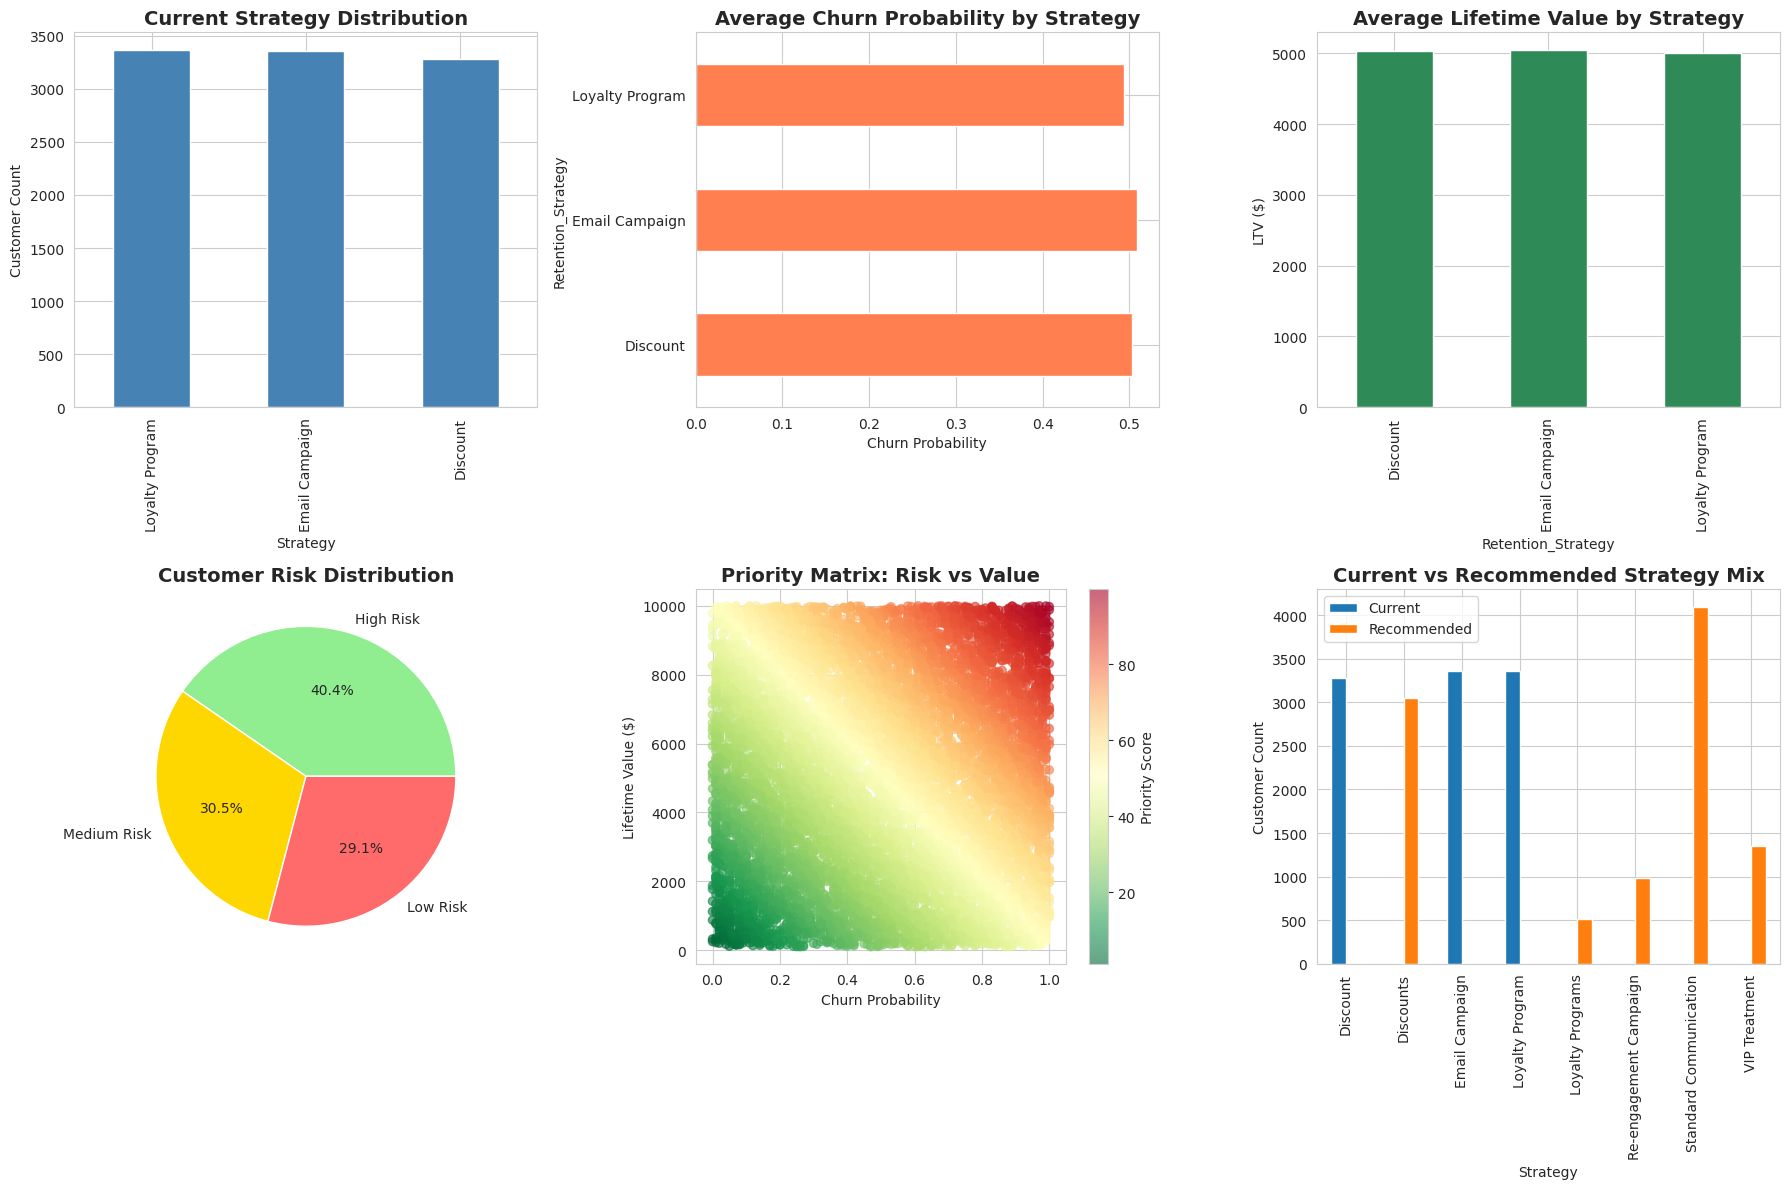

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Create comprehensive dashboard
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Re-define strategy_counts here to ensure it's available
strategy_counts = df['Retention_Strategy'].value_counts()

# 1. Strategy Distribution
strategy_counts.plot(kind='bar', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Current Strategy Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Strategy')
axes[0, 0].set_ylabel('Customer Count')

# 2. Churn by Strategy
df.groupby('Retention_Strategy')['Churn_Probability'].mean().plot(
    kind='barh', ax=axes[0, 1], color='coral')
axes[0, 1].set_title('Average Churn Probability by Strategy', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Churn Probability')

# 3. LTV by Strategy
df.groupby('Retention_Strategy')['Lifetime_Value'].mean().plot(
    kind='bar', ax=axes[0, 2], color='seagreen')
axes[0, 2].set_title('Average Lifetime Value by Strategy', fontsize=14, fontweight='bold')
axes[0, 2].set_ylabel('LTV ($)')

# 4. Risk Distribution
risk_counts = df['Risk_Level'].value_counts()
axes[1, 0].pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%',
               colors=['#90EE90', '#FFD700', '#FF6B6B'])
axes[1, 0].set_title('Customer Risk Distribution', fontsize=14, fontweight='bold')

# 5. Priority Matrix Scatter
scatter = axes[1, 1].scatter(df['Churn_Probability'], df['Lifetime_Value'],
                             c=df['Priority_Score'], cmap='RdYlGn_r', alpha=0.6)
axes[1, 1].set_xlabel('Churn Probability')
axes[1, 1].set_ylabel('Lifetime Value ($)')
axes[1, 1].set_title('Priority Matrix: Risk vs Value', fontsize=14, fontweight='bold')
plt.colorbar(scatter, ax=axes[1, 1], label='Priority Score')

# 6. Recommended vs Current
comparison_counts = pd.DataFrame({
    'Current': df['Retention_Strategy'].value_counts(),
    'Recommended': df['Recommended_Strategy'].value_counts()
}).fillna(0)
comparison_counts.plot(kind='bar', ax=axes[1, 2])
axes[1, 2].set_title('Current vs Recommended Strategy Mix', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Strategy')
axes[1, 2].set_ylabel('Customer Count')
axes[1, 2].legend(loc='best')

plt.tight_layout()
plt.savefig('loyalty_architect_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

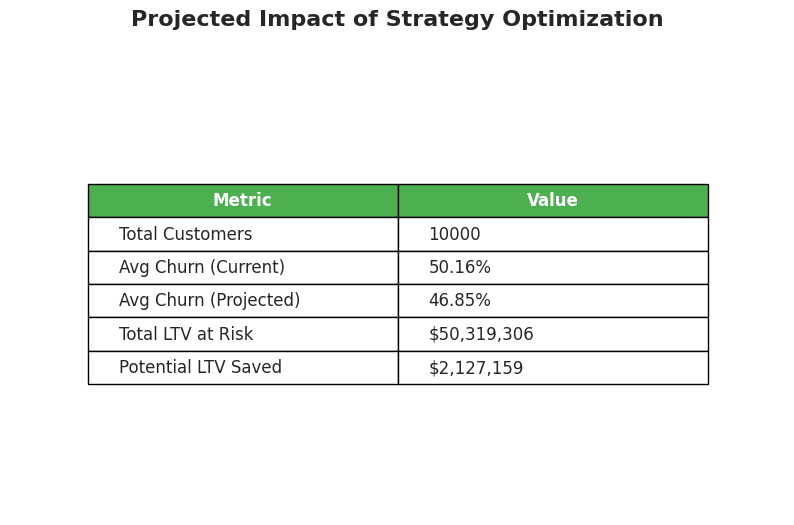

In [23]:
# Calculate potential impact
impact_summary = pd.DataFrame({
    'Metric': ['Total Customers', 'Avg Churn (Current)', 'Avg Churn (Projected)',
               'Total LTV at Risk', 'Potential LTV Saved'],
    'Value': [
        len(df),
        f"{df['Churn_Probability'].mean():.2%}",
        f"{df['Projected_Churn'].mean():.2%}",
        f"${df['Lifetime_Value'].sum():,.0f}",
        f"${(df['Lifetime_Value'] * (df['Churn_Probability'] - df['Projected_Churn'])).sum():,.0f}"
    ]
})

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=impact_summary.values, colLabels=impact_summary.columns,
                cellLoc='left', loc='center', colWidths=[0.4, 0.4])
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)

# Style header
for i in range(len(impact_summary.columns)):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')

plt.title('Projected Impact of Strategy Optimization', fontsize=16, fontweight='bold', pad=20)
plt.savefig('impact_summary.png', dpi=300, bbox_inches='tight')
plt.show()

Deliverable Export

In [ ]:

from google.colab import files
import os
import shutil
from datetime import datetime

# Create export directory
export_dir = 'loyalty_architect_export'
if os.path.exists(export_dir):
    shutil.rmtree(export_dir)
os.makedirs(export_dir)

print("📦 Starting export process...\n")

# ============================================================================
# 1. EXPORT PROCESSED DATASETS
# ============================================================================
print("💾 Exporting datasets...")

# Main processed dataset with all features
df.to_csv(f'{export_dir}/01_complete_processed_data.csv', index=False)
print("   ✓ Complete processed data")

# Customer segments
df[['Customer_ID', 'Risk_Level', 'LTV_Segment', 'Engagement_Score',
    'Priority_Score', 'Action_Priority']].to_csv(
    f'{export_dir}/02_customer_segments.csv', index=False)
print("   ✓ Customer segments")

# Recommendations
df[['Customer_ID', 'Retention_Strategy', 'Recommended_Strategy',
    'Churn_Probability', 'Projected_Churn', 'Lifetime_Value']].to_csv(
    f'{export_dir}/03_strategy_recommendations.csv', index=False)
print("   ✓ Strategy recommendations")

# High priority customers (immediate action needed)
immediate_action = df[df['Action_Priority'] == 'Immediate Action'][
    ['Customer_ID', 'Churn_Probability', 'Lifetime_Value',
     'Recommended_Strategy', 'Region', 'Most_Frequent_Category']
].sort_values('Lifetime_Value', ascending=False)
immediate_action.to_csv(f'{export_dir}/04_immediate_action_customers.csv', index=False)
print("   ✓ Immediate action list")

# Regional analysis
regional_summary = df.groupby('Region').agg({
    'Customer_ID': 'count',
    'Churn_Probability': 'mean',
    'Lifetime_Value': 'mean',
    'Purchase_Frequency': 'mean'
}).round(2)
regional_summary.to_csv(f'{export_dir}/05_regional_analysis.csv')
print("   ✓ Regional analysis")

# ============================================================================
# 2. EXPORT ANALYSIS SUMMARIES
# ============================================================================
print("\n📊 Exporting analysis summaries...")

# Strategy performance comparison
strategy_analysis = df.groupby('Retention_Strategy').agg({
    'Churn_Probability': 'mean',
    'Lifetime_Value': 'mean',
    'Purchase_Frequency': 'mean',
    'Average_Order_Value': 'mean',
    'Customer_ID': 'count'
}).round(2)
strategy_analysis.columns = ['Avg_Churn_Prob', 'Avg_LTV', 'Avg_Purchase_Freq',
                              'Avg_Order_Value', 'Customer_Count']
strategy_analysis.to_csv(f'{export_dir}/06_strategy_performance.csv')
print("   ✓ Strategy performance")

# Risk level summary
risk_summary = df.groupby('Risk_Level').agg({
    'Customer_ID': 'count',
    'Lifetime_Value': ['mean', 'sum'],
    'Churn_Probability': 'mean'
}).round(2)
risk_summary.to_csv(f'{export_dir}/07_risk_level_summary.csv')
print("   ✓ Risk level summary")

# Priority matrix
action_plan = df.groupby(['Action_Priority', 'Recommended_Strategy']).agg({
    'Customer_ID': 'count',
    'Lifetime_Value': 'sum',
    'Churn_Probability': 'mean'
}).round(2)
action_plan.columns = ['Customer_Count', 'Total_LTV_at_Risk', 'Avg_Churn_Risk']
action_plan.to_csv(f'{export_dir}/08_action_priority_matrix.csv')
print("   ✓ Action priority matrix")

# ============================================================================
# 3. EXPORT KEY METRICS & INSIGHTS
# ============================================================================
print("\n📈 Exporting key metrics...")

# Calculate key metrics
total_customers = len(df)
avg_churn_current = df['Churn_Probability'].mean()
avg_churn_projected = df['Projected_Churn'].mean()
total_ltv = df['Lifetime_Value'].sum()
potential_ltv_saved = (df['Lifetime_Value'] * (df['Churn_Probability'] - df['Projected_Churn'])).sum()
churn_reduction_pct = ((avg_churn_current - avg_churn_projected) / avg_churn_current * 100)

# Create metrics summary
metrics_summary = {
    'Metric': [
        'Total Customers',
        'Average Churn Rate (Current)',
        'Average Churn Rate (Projected)',
        'Churn Reduction %',
        'Total Customer LTV',
        'Total LTV at Risk (Current)',
        'Potential LTV Saved',
        'High Risk Customers',
        'Immediate Action Required',
        'Analysis Date'
    ],
    'Value': [
        f"{total_customers:,}",
        f"{avg_churn_current:.2%}",
        f"{avg_churn_projected:.2%}",
        f"{churn_reduction_pct:.1f}%",
        f"${total_ltv:,.2f}",
        f"${total_ltv * avg_churn_current:,.2f}",
        f"${potential_ltv_saved:,.2f}",
        f"{len(df[df['Risk_Level'] == 'High Risk']):,}",
        f"{len(df[df['Action_Priority'] == 'Immediate Action']):,}",
        datetime.now().strftime('%Y-%m-%d')
    ]
}

import pandas as pd
metrics_df = pd.DataFrame(metrics_summary)
metrics_df.to_csv(f'{export_dir}/09_executive_metrics.csv', index=False)
print("   ✓ Executive metrics")

# Top insights
insights = {
    'Insight Category': [
        'Best Performing Strategy',
        'Worst Performing Strategy',
        'Highest Risk Region',
        'Most Valuable Segment',
        'Underutilized Strategy',
    ],
    'Finding': [
        df.groupby('Retention_Strategy')['Churn_Probability'].mean().idxmin(),
        df.groupby('Retention_Strategy')['Churn_Probability'].mean().idxmax(),
        df.groupby('Region')['Churn_Probability'].mean().idxmax(),
        df.groupby('LTV_Segment')['Lifetime_Value'].sum().idxmax(),
        df['Recommended_Strategy'].value_counts().index[0]
    ],
    'Value': [
        f"{df.groupby('Retention_Strategy')['Churn_Probability'].mean().min():.2%}",
        f"{df.groupby('Retention_Strategy')['Churn_Probability'].mean().max():.2%}",
        f"{df.groupby('Region')['Churn_Probability'].mean().max():.2%}",
        f"${df.groupby('LTV_Segment')['Lifetime_Value'].sum().max():,.0f}",
        f"{df['Recommended_Strategy'].value_counts().iloc[0]} customers"
    ]
}
insights_df = pd.DataFrame(insights)
insights_df.to_csv(f'{export_dir}/10_key_insights.csv', index=False)
print("   ✓ Key insights")

# ============================================================================
# 4. EXPORT VISUALIZATIONS
# ============================================================================
print("\n🎨 Saving visualizations...")

# Save the main dashboard (if created)
if 'loyalty_architect_dashboard.png' in os.listdir():
    shutil.copy('loyalty_architect_dashboard.png',
                f'{export_dir}/viz_01_main_dashboard.png')
    print("   ✓ Main dashboard")

# Save impact summary (if created)
if 'impact_summary.png' in os.listdir():
    shutil.copy('impact_summary.png',
                f'{export_dir}/viz_02_impact_summary.png')
    print("   ✓ Impact summary")

# Create additional quick visualizations to save
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Churn by Strategy
plt.figure(figsize=(10, 6))
df.groupby('Retention_Strategy')['Churn_Probability'].mean().sort_values().plot(
    kind='barh', color='coral')
plt.title('Average Churn Probability by Retention Strategy', fontsize=14, fontweight='bold')
plt.xlabel('Churn Probability')
plt.tight_layout()
plt.savefig(f'{export_dir}/viz_03_churn_by_strategy.png', dpi=300, bbox_inches='tight')
plt.close()
print("   ✓ Churn by strategy chart")

# Visualization 2: Risk Distribution
plt.figure(figsize=(8, 8))
risk_counts = df['Risk_Level'].value_counts()
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%',
        colors=['#90EE90', '#FFD700', '#FF6B6B'], startangle=90)
plt.title('Customer Risk Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(f'{export_dir}/viz_04_risk_distribution.png', dpi=300, bbox_inches='tight')
plt.close()
print("   ✓ Risk distribution pie chart")

# Visualization 3: Priority Scatter
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Churn_Probability'], df['Lifetime_Value'],
                     c=df['Priority_Score'], cmap='RdYlGn_r', alpha=0.6, s=50)
plt.colorbar(scatter, label='Priority Score')
plt.xlabel('Churn Probability')
plt.ylabel('Lifetime Value ($)')
plt.title('Customer Priority Matrix: Risk vs Value', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(f'{export_dir}/viz_05_priority_matrix.png', dpi=300, bbox_inches='tight')
plt.close()
print("   ✓ Priority matrix scatter plot")

# ============================================================================
# 5. CREATE PROJECT SUMMARY DOCUMENT
# ============================================================================
print("\n📄 Creating project summary document...")

summary_text = f"""
LOYALTY ARCHITECT PROJECT SUMMARY
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
{'='*80}

PROJECT OVERVIEW
{'='*80}
This analysis examined {total_customers:,} customers to optimize retention strategies
and reduce churn while maximizing customer lifetime value.

KEY FINDINGS
{'='*80}
1. Current State:
   - Average churn probability: {avg_churn_current:.2%}
   - Total customer lifetime value: ${total_ltv:,.2f}
   - Customers at high risk: {len(df[df['Risk_Level'] == 'High Risk']):,}

2. Projected Impact:
   - Projected churn with optimized strategies: {avg_churn_projected:.2%}
   - Churn reduction: {churn_reduction_pct:.1f}%
   - Potential LTV saved: ${potential_ltv_saved:,.2f}

3. Strategy Performance:
   Best performing: {df.groupby('Retention_Strategy')['Churn_Probability'].mean().idxmin()}
   Needs improvement: {df.groupby('Retention_Strategy')['Churn_Probability'].mean().idxmax()}

RECOMMENDATIONS
{'='*80}
1. IMMEDIATE ACTION ({len(df[df['Action_Priority'] == 'Immediate Action']):,} customers)
   - High-value customers at high churn risk
   - Implement recommended retention strategies immediately
   - Expected LTV impact: ${df[df['Action_Priority'] == 'Immediate Action']['Lifetime_Value'].sum():,.2f}

2. HIGH PRIORITY ({len(df[df['Action_Priority'] == 'High Priority']):,} customers)
   - Address within 30 days
   - Focus on personalized engagement

3. MONITORING ({len(df[df['Action_Priority'] == 'Monitor']):,} customers)
   - Regular check-ins
   - Proactive engagement before risk escalates

NEXT STEPS
{'='*80}
1. Review immediate_action_customers.csv for quick wins
2. Implement recommended strategies by segment
3. Monitor churn rates monthly
4. Refine model with actual retention results

FILES INCLUDED IN THIS EXPORT
{'='*80}
Data Files:
- 01_complete_processed_data.csv (full dataset with all features)
- 02_customer_segments.csv (risk and value segments)
- 03_strategy_recommendations.csv (recommended actions per customer)
- 04_immediate_action_customers.csv (priority list)
- 05_regional_analysis.csv (geographic insights)

Analysis Files:
- 06_strategy_performance.csv (strategy effectiveness comparison)
- 07_risk_level_summary.csv (risk breakdown)
- 08_action_priority_matrix.csv (prioritized action plan)
- 09_executive_metrics.csv (key KPIs)
- 10_key_insights.csv (top findings)

Visualizations:
- viz_01_main_dashboard.png (comprehensive overview)
- viz_02_impact_summary.png (projected impact)
- viz_03_churn_by_strategy.png (strategy comparison)
- viz_04_risk_distribution.png (customer risk levels)
- viz_05_priority_matrix.png (risk vs value scatter)

TECHNICAL DETAILS
{'='*80}
Analysis Period: {datetime.now().strftime('%B %Y')}
Tools Used: Python (pandas, scikit-learn, matplotlib, seaborn)
Methodology: Segmentation, predictive modeling, optimization
Features Engineered: {len([col for col in df.columns if col not in ['Customer_ID', 'Product_ID', 'Transaction_ID']])} total features

For questions or additional analysis, refer to the Jupyter notebook.
"""

with open(f'{export_dir}/00_PROJECT_SUMMARY.txt', 'w') as f:
    f.write(summary_text)
print("   ✓ Project summary document")

# ============================================================================
# 6. CREATE ZIP FILE
# ============================================================================
print("\n📦 Creating ZIP archive...")

shutil.make_archive('loyalty_architect_complete', 'zip', export_dir)
print("   ✓ ZIP file created")

# ============================================================================
# 7. DOWNLOAD EVERYTHING
# ============================================================================
print("\n⬇️ Downloading files to your computer...")
print("=" * 80)

# Download the complete ZIP file
files.download('loyalty_architect_complete.zip')

print("\n" + "=" * 80)
print("✅ EXPORT COMPLETE!")
print("=" * 80)
print(f"\nAll files have been packaged and downloaded as 'loyalty_architect_complete.zip'")
print(f"Total files exported: {len(os.listdir(export_dir))}")
print("\nUnzip the file on your computer to access:")
print("  • {0} CSV data files".format(len([f for f in os.listdir(export_dir) if f.endswith('.csv')])))
print("  • {0} visualization files".format(len([f for f in os.listdir(export_dir) if f.endswith('.png')])))
print("  • 1 comprehensive project summary")
print("\n💡 TIP: Use these files for:")
print("   - PowerPoint/Keynote presentations")
print("   - Tableau/Power BI dashboards")
print("   - Portfolio documentation")
print("   - Further analysis in Excel")
print("=" * 80)

📦 Starting export process...

💾 Exporting datasets...
   ✓ Complete processed data
   ✓ Customer segments
   ✓ Strategy recommendations
   ✓ Immediate action list
   ✓ Regional analysis

📊 Exporting analysis summaries...
   ✓ Strategy performance
   ✓ Risk level summary
   ✓ Action priority matrix

📈 Exporting key metrics...
   ✓ Executive metrics
   ✓ Key insights

🎨 Saving visualizations...
   ✓ Main dashboard
   ✓ Impact summary


/tmp/ipython-input-1934613798.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('LTV_Segment')['Lifetime_Value'].sum().idxmax(),
/tmp/ipython-input-1934613798.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  f"${df.groupby('LTV_Segment')['Lifetime_Value'].sum().max():,.0f}",


   ✓ Churn by strategy chart
   ✓ Risk distribution pie chart
   ✓ Priority matrix scatter plot

📄 Creating project summary document...
   ✓ Project summary document

📦 Creating ZIP archive...
   ✓ ZIP file created

⬇️ Downloading files to your computer...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ EXPORT COMPLETE!

All files have been packaged and downloaded as 'loyalty_architect_complete.zip'
Total files exported: 16

Unzip the file on your computer to access:
  • 10 CSV data files
  • 5 visualization files
  • 1 comprehensive project summary

💡 TIP: Use these files for:
   - PowerPoint/Keynote presentations
   - Tableau/Power BI dashboards
   - Portfolio documentation
   - Further analysis in Excel


BI Ready Data

In [ ]:
# Create BI-ready dataset
BI_export = df[[
    'Customer_ID', 'Region', 'Retention_Strategy', 'Recommended_Strategy',
    'Risk_Level', 'LTV_Segment', 'Action_Priority',
    'Churn_Probability', 'Projected_Churn', 'Lifetime_Value',
    'Purchase_Frequency', 'Average_Order_Value', 'Engagement_Score',
    'Most_Frequent_Category', 'Time_Between_Purchases'
]]

BI_export.to_csv('BI_ready_data.csv', index=False)
files.download('BI_ready_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Create Tableau-optimized dataset
tableau_data = df[[
    'Customer_ID',
    'Region',
    'Retention_Strategy',
    'Recommended_Strategy',
    'Risk_Level',
    'LTV_Segment',
    'Action_Priority',
    'Most_Frequent_Category',
    'Churn_Probability',
    'Projected_Churn',
    'Lifetime_Value',
    'Purchase_Frequency',
    'Average_Order_Value',
    'Time_Between_Purchases',
    'Engagement_Score',
    'Priority_Score'
]].copy()

# Ensure clean data types
tableau_data['Churn_Probability'] = tableau_data['Churn_Probability'].round(4)
tableau_data['Lifetime_Value'] = tableau_data['Lifetime_Value'].round(2)
tableau_data['Engagement_Score'] = tableau_data['Engagement_Score'].round(3)

# Add helpful calculated fields
tableau_data['Churn_Status'] = tableau_data['Risk_Level']
tableau_data['LTV_at_Risk'] = (tableau_data['Lifetime_Value'] *
                                tableau_data['Churn_Probability']).round(2)

# Export
tableau_data.to_csv('loyalty_architect_tableau.csv', index=False)

from google.colab import files
files.download('loyalty_architect_tableau.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>